ChatGPT

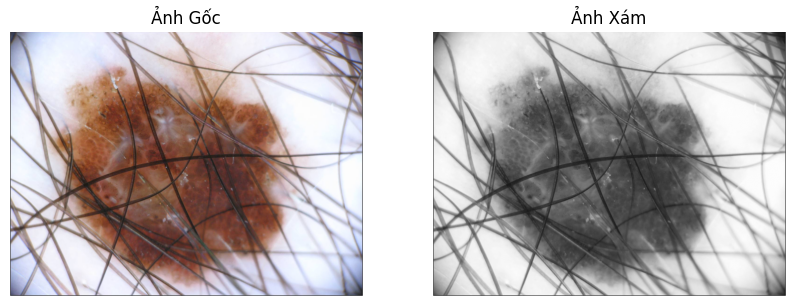

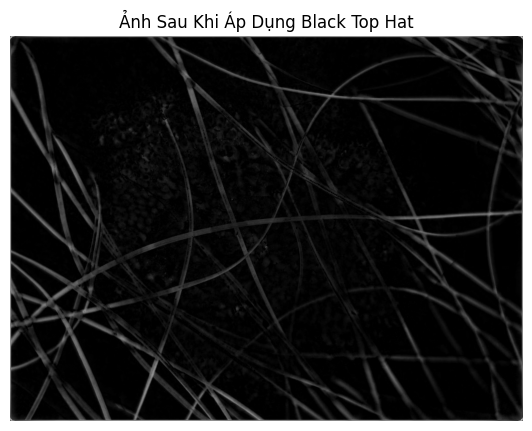

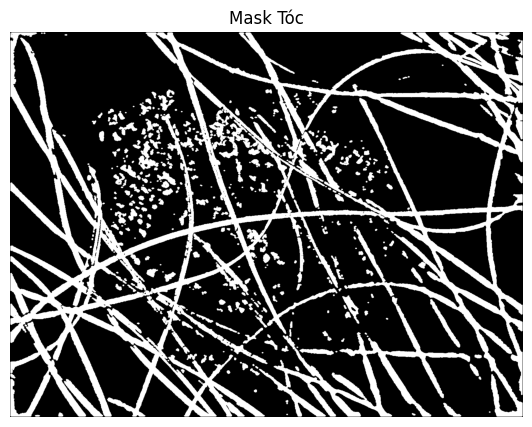

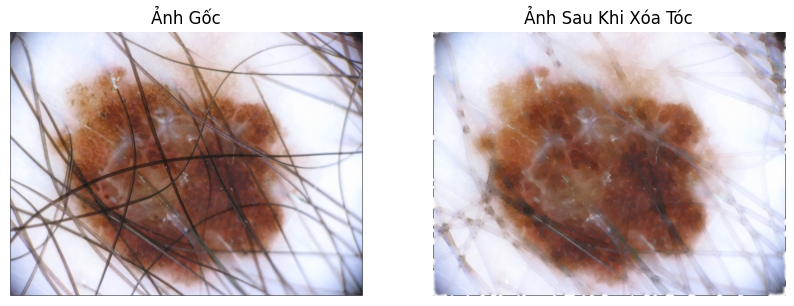

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh màu
image = cv2.imread('ISIC_0000043.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh gốc
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image_rgb), plt.title('Ảnh Gốc')
plt.axis("off")

# Chuyển đổi sang ảnh xám
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2), plt.imshow(image_gray, cmap='gray'), plt.title('Ảnh Xám')
plt.axis("off")
plt.show()

# Tạo phần tử cấu trúc lớn hơn để bắt được nhiều tóc hơn
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))

# Áp dụng bộ lọc Black Top Hat
black_tophat = cv2.morphologyEx(image_gray, cv2.MORPH_BLACKHAT, kernel)

# Hiển thị ảnh sau khi áp dụng Black Top Hat
plt.figure(figsize=(10, 5))
plt.imshow(black_tophat, cmap='gray'), plt.title('Ảnh Sau Khi Áp Dụng Black Top Hat')
plt.axis("off")
plt.show()

# Làm sạch nhiễu bằng phép toán mở
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
hair_mask_clean = cv2.morphologyEx(black_tophat, cv2.MORPH_OPEN, kernel_open)

# Ngưỡng hóa ảnh để tạo mask tóc với ngưỡng thích ứng
_, hair_mask = cv2.threshold(hair_mask_clean, 10, 255, cv2.THRESH_BINARY)

# Hiển thị mask tóc
plt.figure(figsize=(10, 5))
plt.imshow(hair_mask, cmap='gray'), plt.title('Mask Tóc')
plt.axis("off")
plt.show()

# Inpainting để loại bỏ tóc khỏi ảnh gốc
image_no_hair = cv2.inpaint(image, hair_mask, inpaintRadius=15, flags=cv2.INPAINT_TELEA)
image_no_hair_rgb = cv2.cvtColor(image_no_hair, cv2.COLOR_BGR2RGB)

# Hiển thị kết quả cuối cùng
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image_rgb), plt.title('Ảnh Gốc')
plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(image_no_hair_rgb), plt.title('Ảnh Sau Khi Xóa Tóc')
plt.axis("off")
plt.show()

# Lưu ảnh kết quả
cv2.imwrite('skin_image_no_hair.jpg', image_no_hair)
